In [79]:
# 1

In [80]:
#Data import
from sklearn.datasets import load_iris
import pandas as pd

iris = load_iris()
iris_data = pd.DataFrame(iris.data)
y = iris.target

In [81]:
#Normalization
from sklearn.preprocessing import MaxAbsScaler

data = MaxAbsScaler().fit_transform(iris_data)

In [82]:
#Resolve Mapping
import numpy as np

def resolve_mapping(y_pred,y):
  from scipy.stats import mode
  pred_labels = np.zeros_like(y)

  for i in range(len(np.unique(y))):
    mask = (y_pred==i)
    pred_labels[mask]=mode(y[mask])[0]

  return pred_labels

In [83]:
#Clustering Methods
from sklearn.cluster import KMeans, DBSCAN

# K Means
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(data)
kmeans_labels = resolve_mapping(kmeans.labels_, y)

# DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan.fit(data)
dbscan_labels = resolve_mapping(dbscan.labels_, y)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-82-b8d8f39512c8>:10: RuntimeWarning: invalid value encountered in cast
  pred_labels[mask]=mode(y[mask])[0]


In [84]:
# Functions that Calculate Metrics Without Using SKLearn
from sklearn.metrics import mutual_info_score

# AMI
def adjusted_mutual_info(labels_true, labels_pred):
    def entropy(labels):
        unique_labels, counts = np.unique(labels, return_counts=True)
        probs = counts / len(labels)
        return -np.sum(probs * np.log(probs))

    H_true = entropy(labels_true)
    H_pred = entropy(labels_pred)
    MI = mutual_info_score(labels_true, labels_pred)
    AMI = (MI - (H_true + H_pred) / 2) / ((H_true + H_pred) / 2)
    return AMI

# Homogeneity Score
def homogeneity(labels_true, labels_pred):
    unique_labels_true, counts_true = np.unique(labels_true, return_counts=True)
    n_samples = len(labels_true)
    h = 0
    for c in unique_labels_true:
        labels_pred_c = labels_pred[labels_true == c]
        _, counts_pred_c = np.unique(labels_pred_c, return_counts=True)
        h += np.max(counts_pred_c) / n_samples
    return h

# Completeness Score
def completeness(labels_true, labels_pred):
    unique_labels_pred, counts_pred = np.unique(labels_pred, return_counts=True)
    n_samples = len(labels_true)
    c = 0
    for k in unique_labels_pred:
        labels_true_k = labels_true[labels_pred == k]
        _, counts_true_k = np.unique(labels_true_k, return_counts=True)
        c += np.max(counts_true_k) / n_samples
    return c

# V Measure
def v_measure(labels_true, labels_pred):
    h = homogeneity(labels_true, labels_pred)
    c = completeness(labels_true, labels_pred)
    v_measure_score = 2 * (h * c) / (h + c) if (h + c) > 0 else 0
    return v_measure_score

In [85]:
# Print the Accuracy Scores for All the Metrics for Each Method
print("Metrics for Iris Data K-Means Under MaxAbs Normalization:\n")
print("Adjusted Mutual Information (KMeans):", adjusted_mutual_info(y, kmeans_labels))
print("Homogeneity (KMeans):", homogeneity(y, kmeans_labels))
print("Completeness (KMeans):", completeness(y, kmeans_labels))
print("V-Measure (KMeans):", v_measure(y, kmeans_labels))

print("\n\nMetrics for Iris Data DBSCAN Under MaxAbs Normalization:\n")
print("Adjusted Mutual Information (DBSCAN):", adjusted_mutual_info(y, dbscan_labels))
print("Homogeneity (DBSCAN):", homogeneity(y, dbscan_labels))
print("Completeness (DBSCAN):", completeness(y, dbscan_labels))
print("V-Measure (DBSCAN):", v_measure(y, dbscan_labels))

Metrics for Iris Data K-Means Under MaxAbs Normalization:

Adjusted Mutual Information (KMeans): -0.135814493179778
Homogeneity (KMeans): 0.96
Completeness (KMeans): 0.96
V-Measure (KMeans): 0.96


Metrics for Iris Data DBSCAN Under MaxAbs Normalization:

Adjusted Mutual Information (DBSCAN): -1.0
Homogeneity (DBSCAN): 1.0
Completeness (DBSCAN): 0.3333333333333333
V-Measure (DBSCAN): 0.5


In [86]:
# 2

In [87]:
# Load and Import Credit Dataset
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

credit = pd.read_csv('/content/drive/My Drive/Colab Notebooks/credit_data_simulate.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [88]:
credit.head()

,Working capital / Total Assets (WC_TA),Retained Earnings / Total Assets (RE_TA),Earnings Before Interests and Taxes / Total Assets (EBIT_TA),Market Value of Equity / Book Value of Total Debt (MVE_BVTD),Sales / Total Assets (S_TA),Industry sector labels from 1-12,Credit status
0,0.121,0.413,0.057,3.647,0.466,12.0,1.0
1,0.470,0.752,0.070,11.596,1.120,8.0,1.0
2,0.110,0.337,0.045,3.835,0.812,4.0,1.0
3,0.511,0.869,0.106,8.538,0.732,2.0,1.0
4,0.202,0.460,0.064,3.685,0.682,4.0,1.0


In [89]:
# Cleanse Data of Missing Values
credit = credit.dropna()

In [90]:
# Set Data and Target
from sklearn.preprocessing import LabelEncoder

credit_data = credit.iloc[:,:-1].values
credit_target = LabelEncoder().fit_transform(credit['Credit status'])

In [91]:
X = credit_data
y = credit_target

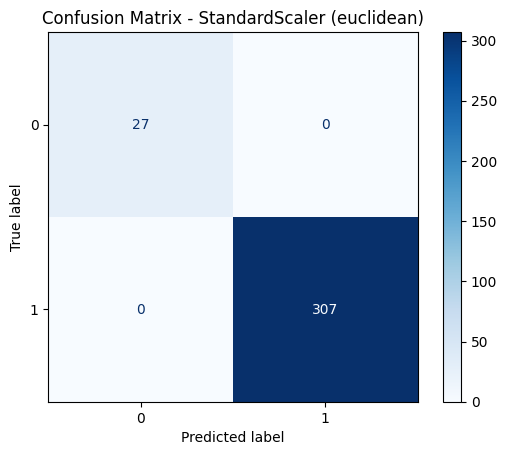

Classification Report - StandardScaler (euclidean):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        27
           1       1.00      1.00      1.00       307

    accuracy                           1.00       334
   macro avg       1.00      1.00      1.00       334
weighted avg       1.00      1.00      1.00       334

d-index - StandardScaler (euclidean): 1.0



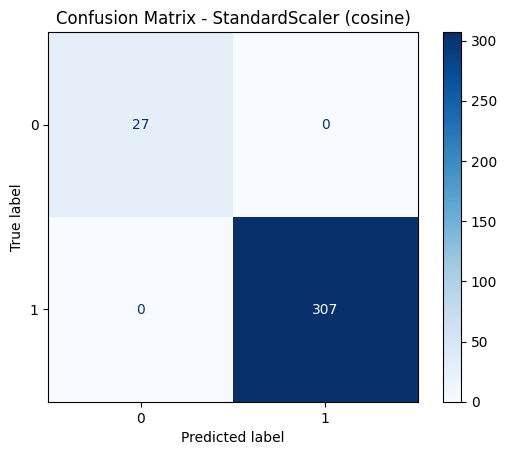

Classification Report - StandardScaler (cosine):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        27
           1       1.00      1.00      1.00       307

    accuracy                           1.00       334
   macro avg       1.00      1.00      1.00       334
weighted avg       1.00      1.00      1.00       334

d-index - StandardScaler (cosine): 1.0



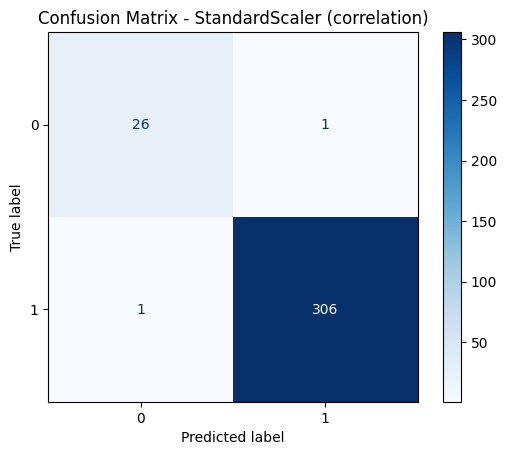

Classification Report - StandardScaler (correlation):
              precision    recall  f1-score   support

           0       0.96      0.96      0.96        27
           1       1.00      1.00      1.00       307

    accuracy                           0.99       334
   macro avg       0.98      0.98      0.98       334
weighted avg       0.99      0.99      0.99       334

d-index - StandardScaler (correlation): 0.9940119760479041



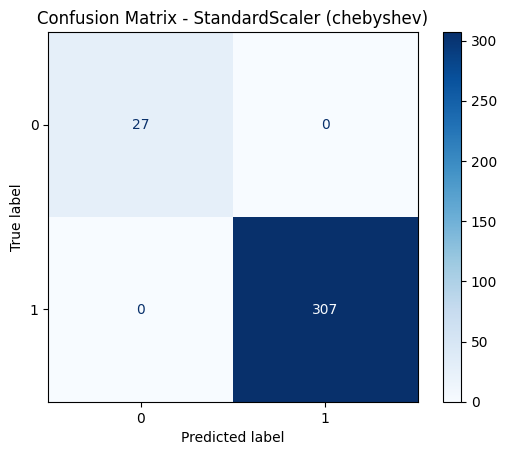

Classification Report - StandardScaler (chebyshev):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        27
           1       1.00      1.00      1.00       307

    accuracy                           1.00       334
   macro avg       1.00      1.00      1.00       334
weighted avg       1.00      1.00      1.00       334

d-index - StandardScaler (chebyshev): 1.0



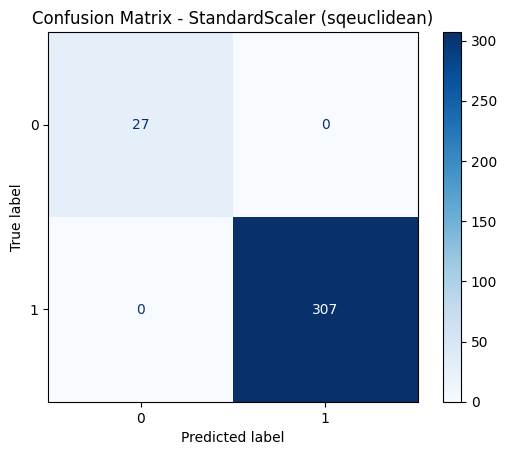

Classification Report - StandardScaler (sqeuclidean):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        27
           1       1.00      1.00      1.00       307

    accuracy                           1.00       334
   macro avg       1.00      1.00      1.00       334
weighted avg       1.00      1.00      1.00       334

d-index - StandardScaler (sqeuclidean): 1.0



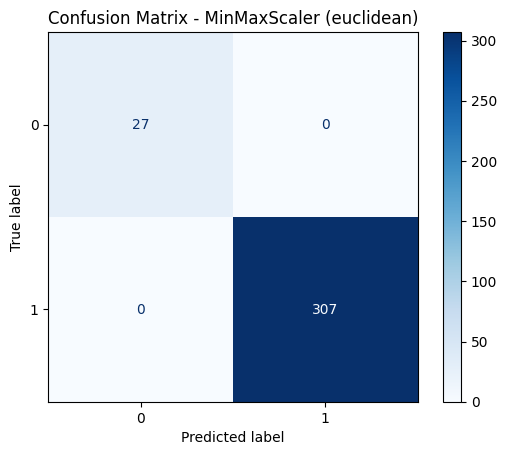

Classification Report - MinMaxScaler (euclidean):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        27
           1       1.00      1.00      1.00       307

    accuracy                           1.00       334
   macro avg       1.00      1.00      1.00       334
weighted avg       1.00      1.00      1.00       334

d-index - MinMaxScaler (euclidean): 1.0



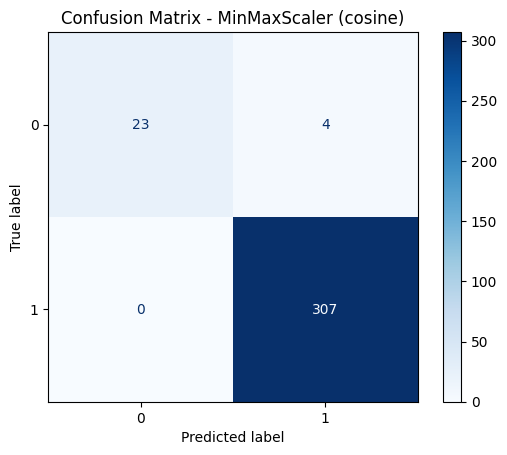

Classification Report - MinMaxScaler (cosine):
              precision    recall  f1-score   support

           0       1.00      0.85      0.92        27
           1       0.99      1.00      0.99       307

    accuracy                           0.99       334
   macro avg       0.99      0.93      0.96       334
weighted avg       0.99      0.99      0.99       334

d-index - MinMaxScaler (cosine): 0.9880239520958084



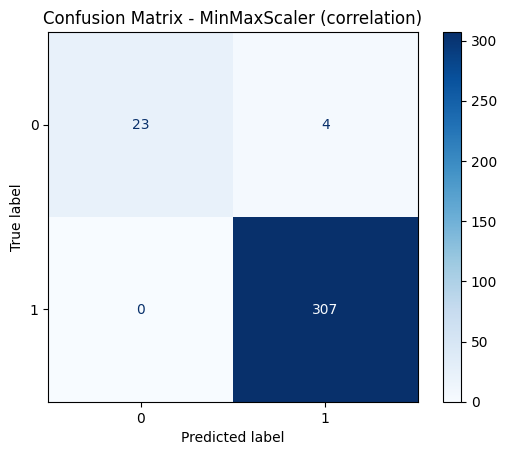

Classification Report - MinMaxScaler (correlation):
              precision    recall  f1-score   support

           0       1.00      0.85      0.92        27
           1       0.99      1.00      0.99       307

    accuracy                           0.99       334
   macro avg       0.99      0.93      0.96       334
weighted avg       0.99      0.99      0.99       334

d-index - MinMaxScaler (correlation): 0.9880239520958084



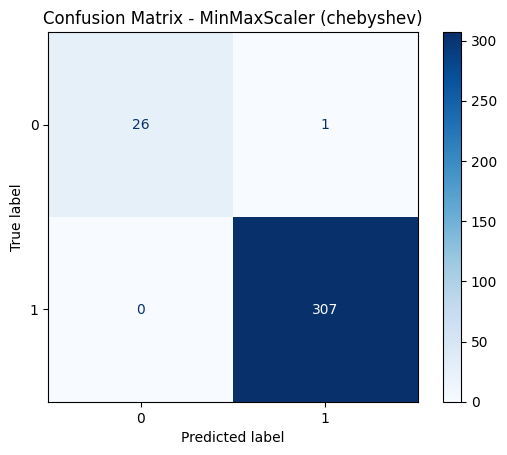

Classification Report - MinMaxScaler (chebyshev):
              precision    recall  f1-score   support

           0       1.00      0.96      0.98        27
           1       1.00      1.00      1.00       307

    accuracy                           1.00       334
   macro avg       1.00      0.98      0.99       334
weighted avg       1.00      1.00      1.00       334

d-index - MinMaxScaler (chebyshev): 0.9970059880239521



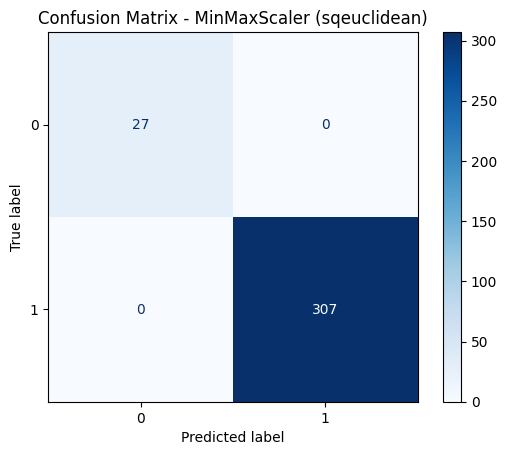

Classification Report - MinMaxScaler (sqeuclidean):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        27
           1       1.00      1.00      1.00       307

    accuracy                           1.00       334
   macro avg       1.00      1.00      1.00       334
weighted avg       1.00      1.00      1.00       334

d-index - MinMaxScaler (sqeuclidean): 1.0



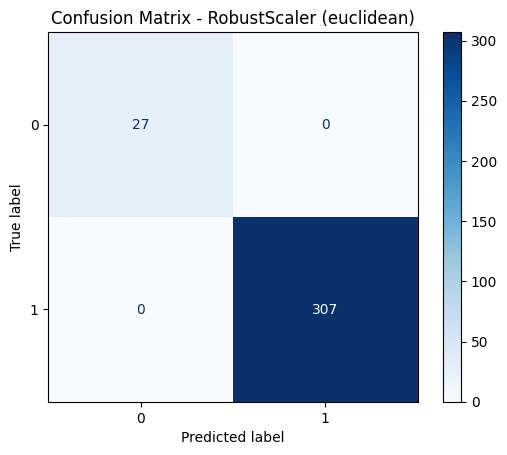

Classification Report - RobustScaler (euclidean):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        27
           1       1.00      1.00      1.00       307

    accuracy                           1.00       334
   macro avg       1.00      1.00      1.00       334
weighted avg       1.00      1.00      1.00       334

d-index - RobustScaler (euclidean): 1.0



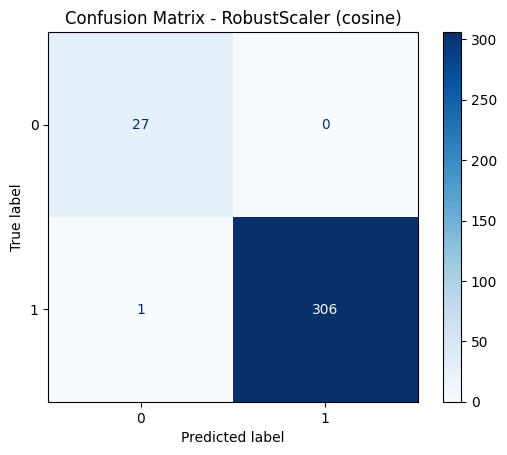

Classification Report - RobustScaler (cosine):
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        27
           1       1.00      1.00      1.00       307

    accuracy                           1.00       334
   macro avg       0.98      1.00      0.99       334
weighted avg       1.00      1.00      1.00       334

d-index - RobustScaler (cosine): 0.9970059880239521



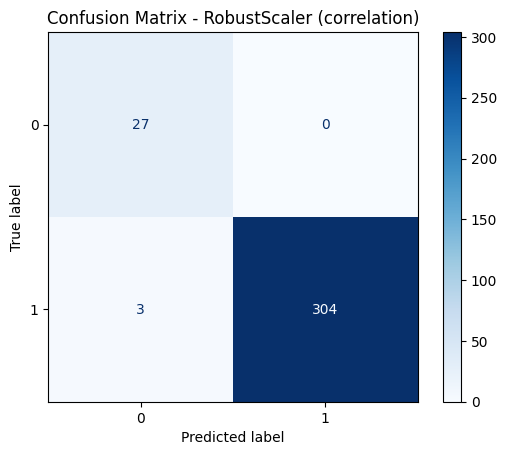

Classification Report - RobustScaler (correlation):
              precision    recall  f1-score   support

           0       0.90      1.00      0.95        27
           1       1.00      0.99      1.00       307

    accuracy                           0.99       334
   macro avg       0.95      1.00      0.97       334
weighted avg       0.99      0.99      0.99       334

d-index - RobustScaler (correlation): 0.9910179640718563



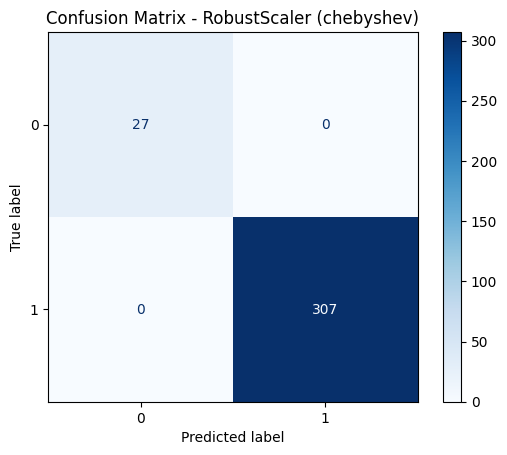

Classification Report - RobustScaler (chebyshev):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        27
           1       1.00      1.00      1.00       307

    accuracy                           1.00       334
   macro avg       1.00      1.00      1.00       334
weighted avg       1.00      1.00      1.00       334

d-index - RobustScaler (chebyshev): 1.0



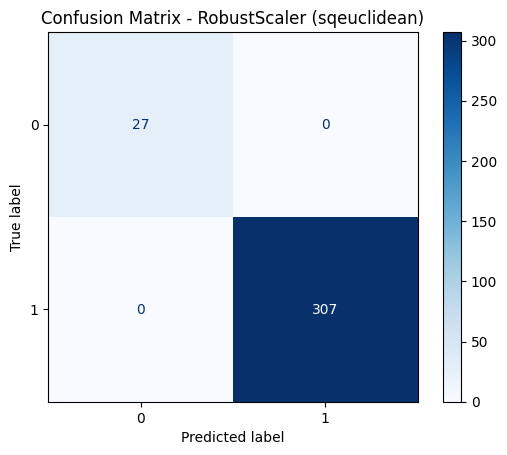

Classification Report - RobustScaler (sqeuclidean):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        27
           1       1.00      1.00      1.00       307

    accuracy                           1.00       334
   macro avg       1.00      1.00      1.00       334
weighted avg       1.00      1.00      1.00       334

d-index - RobustScaler (sqeuclidean): 1.0



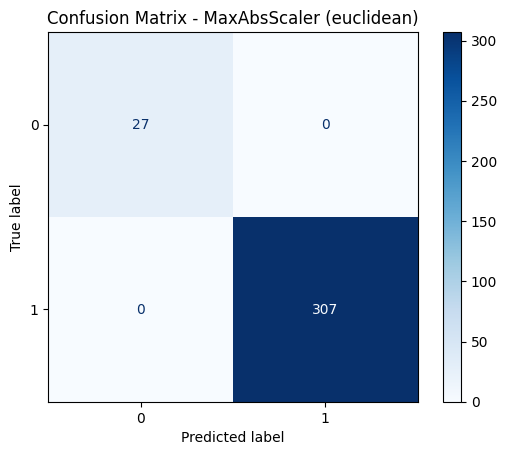

Classification Report - MaxAbsScaler (euclidean):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        27
           1       1.00      1.00      1.00       307

    accuracy                           1.00       334
   macro avg       1.00      1.00      1.00       334
weighted avg       1.00      1.00      1.00       334

d-index - MaxAbsScaler (euclidean): 1.0



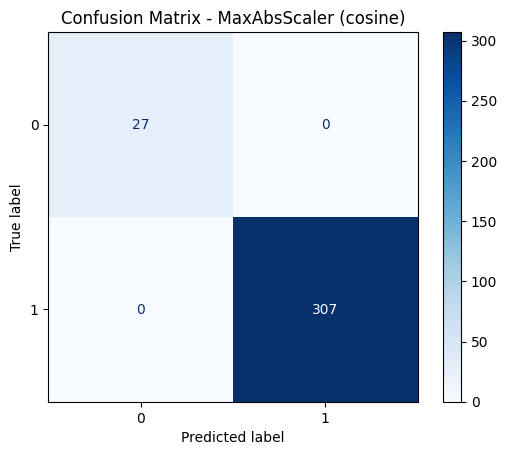

Classification Report - MaxAbsScaler (cosine):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        27
           1       1.00      1.00      1.00       307

    accuracy                           1.00       334
   macro avg       1.00      1.00      1.00       334
weighted avg       1.00      1.00      1.00       334

d-index - MaxAbsScaler (cosine): 1.0



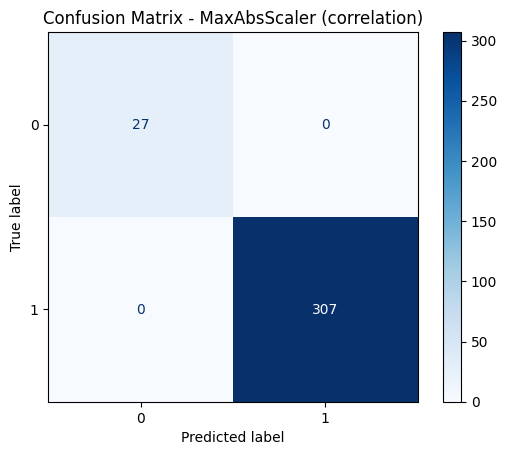

Classification Report - MaxAbsScaler (correlation):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        27
           1       1.00      1.00      1.00       307

    accuracy                           1.00       334
   macro avg       1.00      1.00      1.00       334
weighted avg       1.00      1.00      1.00       334

d-index - MaxAbsScaler (correlation): 1.0



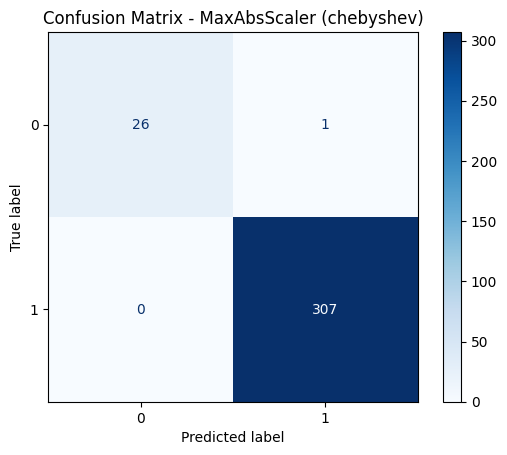

Classification Report - MaxAbsScaler (chebyshev):
              precision    recall  f1-score   support

           0       1.00      0.96      0.98        27
           1       1.00      1.00      1.00       307

    accuracy                           1.00       334
   macro avg       1.00      0.98      0.99       334
weighted avg       1.00      1.00      1.00       334

d-index - MaxAbsScaler (chebyshev): 0.9970059880239521



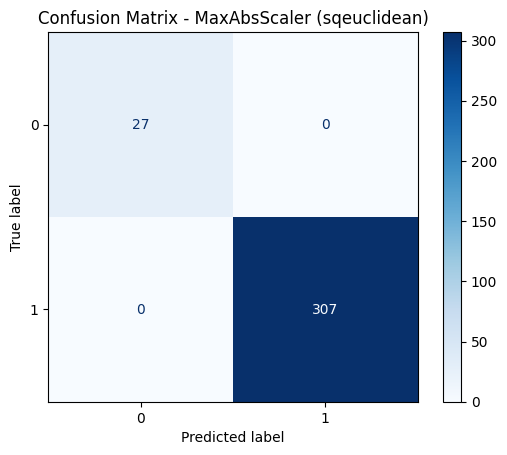

Classification Report - MaxAbsScaler (sqeuclidean):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        27
           1       1.00      1.00      1.00       307

    accuracy                           1.00       334
   macro avg       1.00      1.00      1.00       334
weighted avg       1.00      1.00      1.00       334

d-index - MaxAbsScaler (sqeuclidean): 1.0



In [92]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, MaxAbsScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

# Normalization methods
normalizers = {
    'StandardScaler': StandardScaler(),
    'MinMaxScaler': MinMaxScaler(),
    'RobustScaler': RobustScaler(),
    'MaxAbsScaler': MaxAbsScaler()
}

# Split data into training and testing sets (80/20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# K-Fold cross-validation (k=10)
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# k-NN classifiers with different distance metrics
distances = ['euclidean', 'cosine', 'correlation', 'chebyshev', 'sqeuclidean']

for scaler_name, scaler in normalizers.items():
    # Normalize data
    X_train_norm = scaler.fit_transform(X_train)
    X_test_norm = scaler.transform(X_test)

    for distance in distances:
        # Initialize k-NN classifier
        knn = KNeighborsClassifier(n_neighbors=5, metric=distance)

        # Train classifier using K-Fold cross-validation
        cv_scores = cross_val_score(knn, X_train_norm, y_train, cv=kf)

        # Fit classifier to the entire training data
        knn.fit(X_train_norm, y_train)

        # Predict on the test set
        y_pred = knn.predict(X_test_norm)

        # Compute confusion matrix
        cm = confusion_matrix(y_test, y_pred)

        # Visualize confusion matrix
        disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knn.classes_)
        disp.plot(cmap=plt.cm.Blues)
        plt.title(f'Confusion Matrix - {scaler_name} ({distance})')
        plt.show()

        # Print classification report
        print(f"Classification Report - {scaler_name} ({distance}):")
        print(classification_report(y_test, y_pred))

        # Calculate and print d-index
        d_index = (cm[0, 0] + cm[1, 1]) / np.sum(cm)
        print(f"d-index - {scaler_name} ({distance}): {d_index}\n")


In [93]:
# 3

In [94]:
# Import data
pm = pd.read_csv('/content/drive/My Drive/Colab Notebooks/PM2.5_Beijing_2010_2014.csv')

In [95]:
pm.head()

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
0,1,2010,1,1,0,NaN,-21,-11.0,1021.0,NW,1.79,0,0
1,2,2010,1,1,1,NaN,-21,-12.0,1020.0,NW,4.92,0,0
2,3,2010,1,1,2,NaN,-21,-11.0,1019.0,NW,6.71,0,0
3,4,2010,1,1,3,NaN,-21,-14.0,1019.0,NW,9.84,0,0
4,5,2010,1,1,4,NaN,-20,-12.0,1018.0,NW,12.97,0,0


In [96]:
# Remove missing values
clean_pm = pm.dropna()
clean_pm.head()

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
24,25,2010,1,2,0,129.0,-16,-4.0,1020.0,SE,1.79,0,0
25,26,2010,1,2,1,148.0,-15,-4.0,1020.0,SE,2.68,0,0
26,27,2010,1,2,2,159.0,-11,-5.0,1021.0,SE,3.57,0,0
27,28,2010,1,2,3,181.0,-7,-5.0,1022.0,SE,5.36,1,0
28,29,2010,1,2,4,138.0,-7,-5.0,1022.0,SE,6.25,2,0


In [97]:
# For loop that changes the numerical feature pm2.5 into observations of class 'high', 'low' or 'medium' pm2.5 concentration
for index, row in clean_pm.iterrows():
    if row['pm2.5'] > 100:
        clean_pm.at[index, 'pm2.5'] = 'high'
    elif row['pm2.5'] < 50:
        clean_pm.at[index, 'pm2.5'] = 'low'
    else:
        clean_pm.at[index, 'pm2.5'] = 'medium'

In [98]:
# Remove non-numerical and redundant columns
clean_pm = clean_pm.drop(['cbwd', 'Is', 'Ir'], axis=1)

In [99]:
# Get our data and target
pm_data = clean_pm.iloc[:, clean_pm.columns != clean_pm.columns[5]]
pm_target = LabelEncoder().fit_transform(clean_pm['pm2.5'])

In [100]:
X = pm_data
y = pm_target

In [101]:
#Clustering Method
from sklearn.cluster import KMeans, BisectingKMeans

def doClustering(data, k):
  bkmeans = BisectingKMeans(n_clusters=k, random_state=42).fit_predict(data)
  bkmeans_labels = bkmeans
  return bkmeans_labels

In [102]:
bkmeans_labels = doClustering(pm_data, 3)

In [103]:
#Resolve Mapping
import numpy as np

def resolve_mapping(y_pred,y1):
  from scipy.stats import mode
  pred_labels = np.zeros_like(y)

  for i in range(len(np.unique(y))):
    mask = (y_pred==i)
    pred_labels[mask]=mode(y[mask])[0]

  return pred_labels

In [104]:
pred = resolve_mapping(bkmeans_labels, pm_target)

In [105]:
# Calculate the accuracy using the following metrics:
# V-measure, ARI, AMI, and Silhouette Coefficient

from sklearn.metrics.cluster import v_measure_score, adjusted_rand_score, adjusted_mutual_info_score, silhouette_score

print(f'Metrics for Bisecting K-Means on PM2.5 Raw Data:')
print("V-measure: %0.3f" % v_measure_score(y, pred))
print("Adjusted Rand Index: %0.3f" % adjusted_rand_score(y, pred))
print("Adjusted Mutual Information: %0.3f" % adjusted_mutual_info_score(y, pred))
print("Silhouette Coefficient: %0.3f" % silhouette_score(X, pred))
print('')

Metrics for Bisecting K-Means on PM2.5 Raw Data:
V-measure: 0.001
Adjusted Rand Index: 0.001
Adjusted Mutual Information: 0.001
Silhouette Coefficient: 0.124



In [106]:
# Reset and go back to 'pm' dataset and clean once again
clean_pm = pm.dropna()
clean_pm = clean_pm.drop(['cbwd', 'Is', 'Ir'], axis=1)

for index, row in clean_pm.iterrows():
    if row['pm2.5'] > 100:
        clean_pm.at[index, 'pm2.5'] = 'high'
    else:
        clean_pm.at[index, 'pm2.5'] = 'low'

clean_pm.head()

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,Iws
24,25,2010,1,2,0,high,-16,-4.0,1020.0,1.79
25,26,2010,1,2,1,high,-15,-4.0,1020.0,2.68
26,27,2010,1,2,2,high,-11,-5.0,1021.0,3.57
27,28,2010,1,2,3,high,-7,-5.0,1022.0,5.36
28,29,2010,1,2,4,high,-7,-5.0,1022.0,6.25


In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

print("Mean Squared Error for Each Metric Under KNN: \n")

# Split the dataset into training and testing sets
train_data = clean_pm[clean_pm['year'] != 2014]
test_data = clean_pm[clean_pm['year'] == 2014]

# Define features and target variable
X_train = train_data.iloc[:, :5].values
y_train = LabelEncoder().fit_transform(train_data['pm2.5'])
X_test = test_data.iloc[:, :5].values
y_test = LabelEncoder().fit_transform(test_data['pm2.5'])

# Define KNN models with different distance metrics
distance_metrics = ['euclidean', 'cosine', 'correlation', 'chebyshev', 'sqeuclidean']
for metric in distance_metrics:
    knn = KNeighborsRegressor(metric=metric)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)

    # We use Mean Squared Error to Calculate Our Accuracy
    mse = mean_squared_error(y_test, y_pred)
    print(f"Distance Metric: {metric}, MSE: {mse}")

Mean Squared Error for Each Metric Under KNN: 

Distance Metric: euclidean, MSE: 0.3593118577531463
Distance Metric: cosine, MSE: 0.3435723357579957
Distance Metric: correlation, MSE: 0.3547950583073548
Distance Metric: chebyshev, MSE: 0.3594504098833853
